In [1]:
from manim import *

config.media_width = "100%"
config.assets_dir = "./assets/"

Manim Community v0.16.0.post0

In [2]:
%%manim -v WARNING --disable_caching -qm MyScene

class MyScene(Scene):
    def construct(self):
        circle = Circle()
        self.play(GrowFromCenter(circle))
        self.wait()


In [3]:
X_MIN = -6
X_MAX = 6+1

Y_MIN = -3
Y_MAX = 3+1

X_RANGE = range(X_MIN,  X_MAX)
Y_RANGE = range(Y_MIN,  Y_MAX)

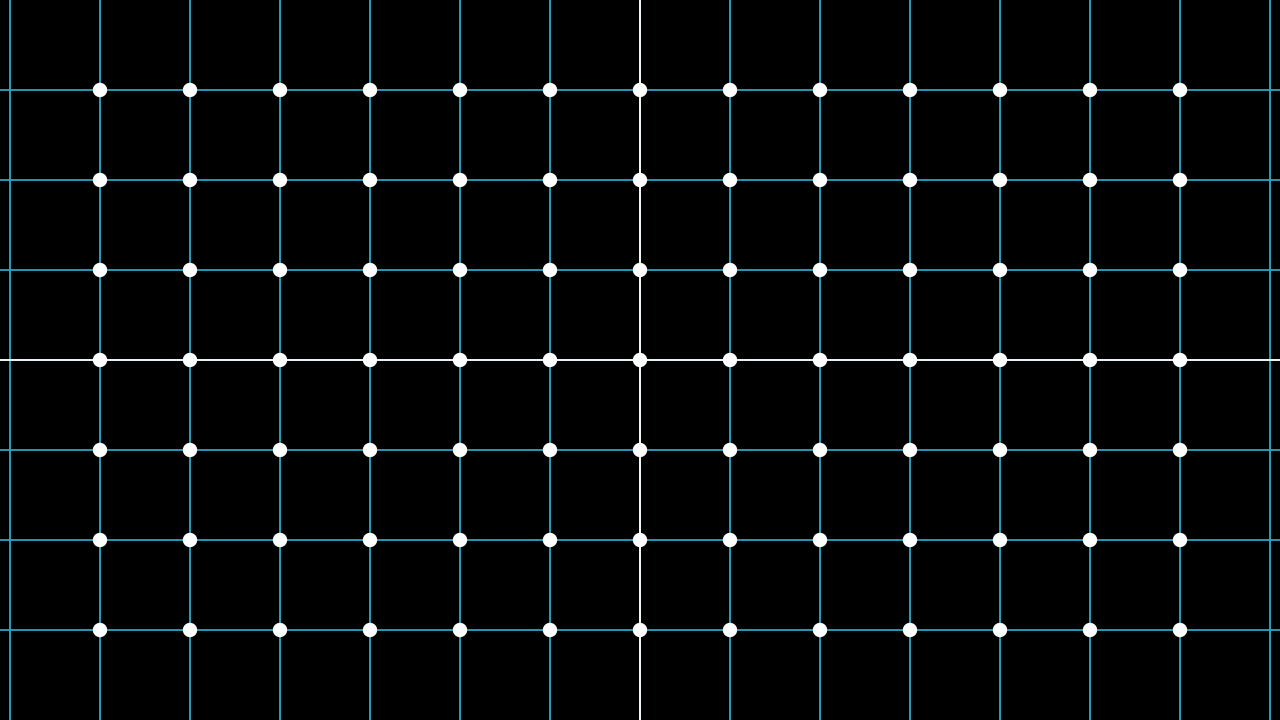

In [4]:
%%manim -v WARNING --disable_caching -qm MyScene


class MyScene(Scene):
    def construct(self):
        self.add(NumberPlane())
        for i in X_RANGE:
            for j in Y_RANGE:
                self.add(Dot([i,j,0]))
        

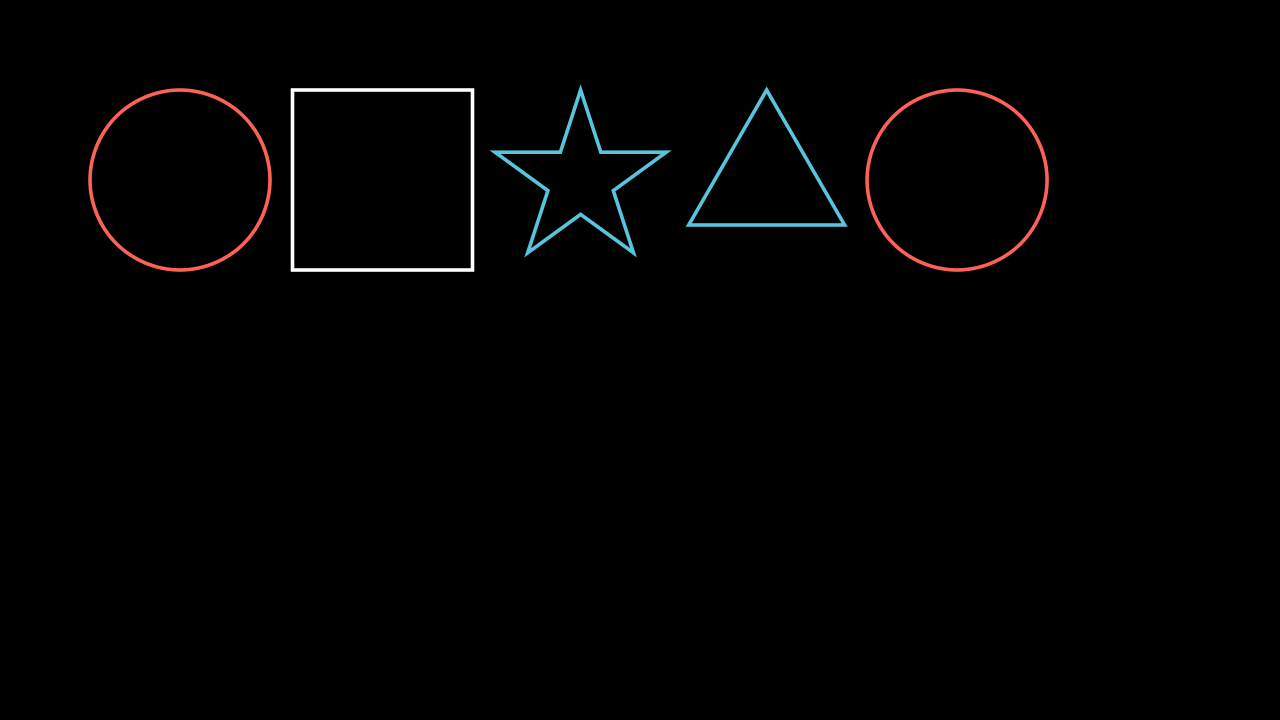

In [5]:
%%manim -v WARNING --disable_caching -qm MyScene

class MyScene(Scene):
    def construct(self):
        circle = Circle()\
            .to_corner(UL,buff=1)

        mobs = [circle,Square(),Star(),Triangle(),Circle()]

        for i in range(len(mobs)-1):
            mobs[i+1].next_to(mobs[i],RIGHT,aligned_edge=UP)

        self.add(*mobs)

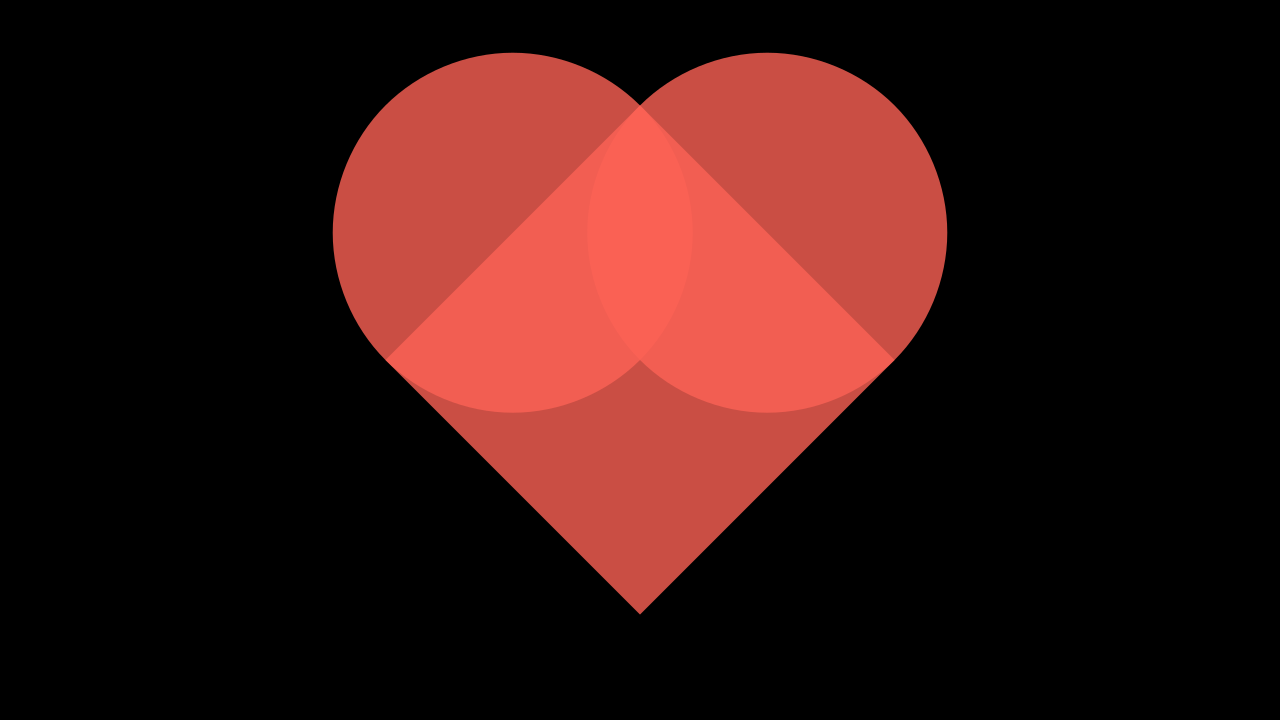

In [6]:
%%manim -v WARNING --disable_caching -qm MyScene

class MyScene(Scene):
    def construct(self):
        fig_kwargs = {"color": RED, "fill_opacity": 0.8, "stroke_width": 0}
        left_circle = Circle(**fig_kwargs).set(height=4)
        right_circle = left_circle.copy()
        square = Square(**fig_kwargs).set(height=4)

        left_circle.shift(LEFT*2)
        right_circle.shift(UP*2)

        pivot_kwargs = {"angle":-PI/4, "about_point": square.get_center()}
        square.rotate(**pivot_kwargs)
        left_circle.rotate(**pivot_kwargs)
        right_circle.rotate(**pivot_kwargs)

        self.add(square,left_circle,right_circle)

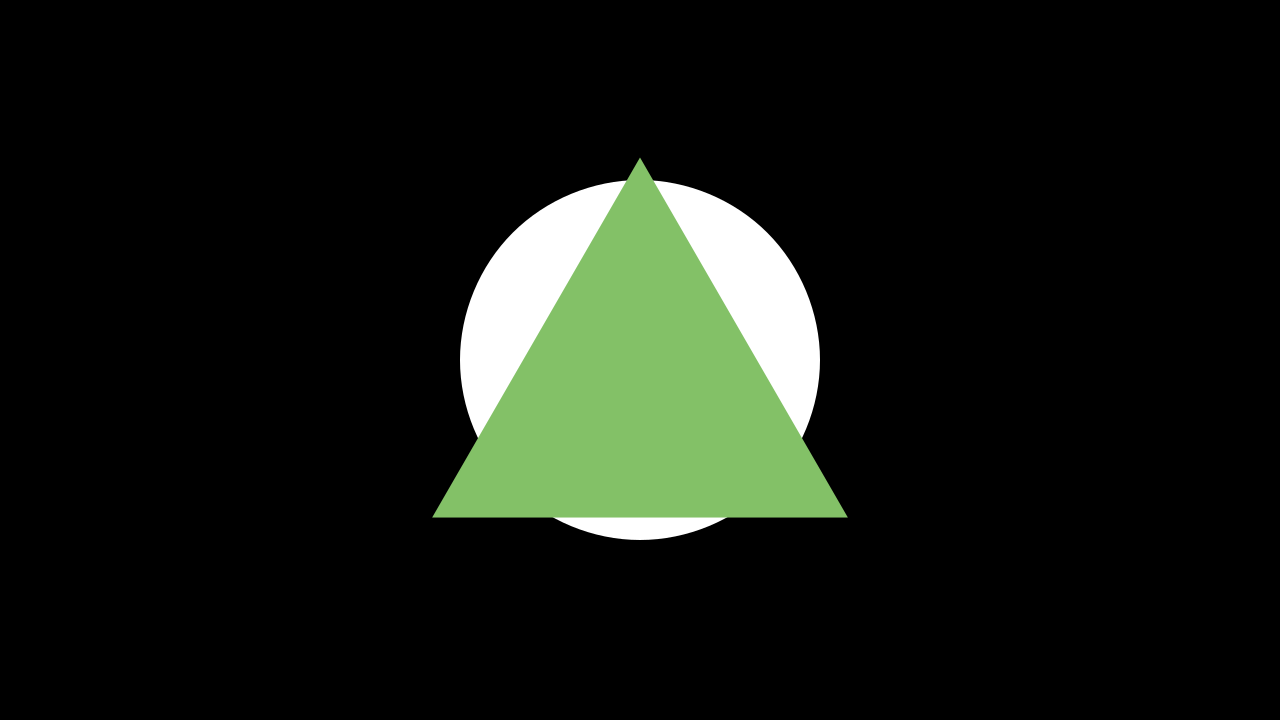

In [7]:
%%manim -v WARNING --disable_caching -qm MyScene

class MyScene(Scene):
    def construct(self):
        self.add(
            Circle(**{"color": WHITE, "fill_opacity": 1, "stroke_width": 0}).set(height=4),
            Triangle(**{"color": GREEN, "fill_opacity": 1, "stroke_width": 0}).set(height=4),
        )

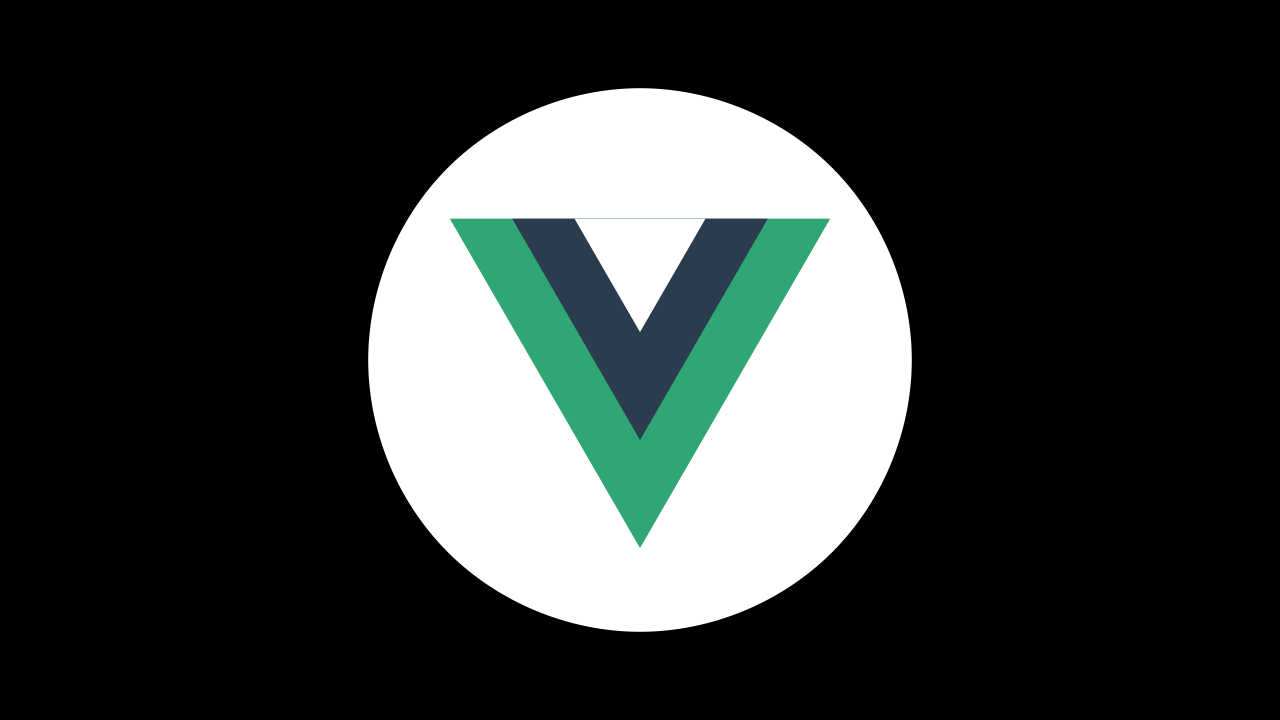

In [8]:
%%manim -v WARNING --disable_caching -qm MyScene

class MyScene(Scene):
    def construct(self):
        fig_kwargs = {"fill_opacity": 1}
        circle = Circle(color=WHITE,**fig_kwargs).scale(3)

        big_triangle = Triangle(color="#2FA673",**fig_kwargs).scale(2.4)
        big_triangle.rotate(PI,about_point=ORIGIN)

        mid_triangle = big_triangle.copy()
        mid_triangle.scale(2/3,about_edge=UP).set_color("#2A3C4E")

        small_triangle = big_triangle.copy()
        small_triangle.scale(1/3,about_edge=UP).set_color(WHITE)

        self.add(circle,big_triangle,mid_triangle,small_triangle)


In [11]:
%%manim -v WARNING --disable_caching -qm MyScene

class MyScene(Scene):
    def construct(self):
        sq = Square(fill_opacity=1)

        self.play(FadeToColor(sq,RED,run_time=2))
        self.wait()
        self.add_sound("sound_5_secs.mp3")
        self.play(FadeToColor(sq,BLUE,run_time=1))
        self.play(FadeToColor(sq,GREEN,run_time=3))
        self.wait(2)
        self.play(FadeToColor(sq,YELLOW,run_time=2))
        self.wait()


In [14]:
%%manim -v WARNING --disable_caching -qm MyScene

class MyScene(Scene):
    def construct(self):
        big_rec = Rectangle(width=7,height=4,fill_opacity=1,color=WHITE)
        GREEN_FLAG_COLOR = "#005940"
        RED_FLAG_COLOR   = "#BE1126"

        green_rec = big_rec.copy()
        green_rec.scale([1/3,1,1],about_edge=LEFT).set_color(GREEN_FLAG_COLOR)
        red_rec = big_rec.copy()
        red_rec.scale([1/3,1,1],about_edge=RIGHT).set_color(RED_FLAG_COLOR)

        logo = SVGMobject("./assets/mexico_logo.svg").scale(0.9)

        self.play(
            Write(big_rec),
            Write(green_rec),
            Write(red_rec),
        )
        self.play(Write(logo,stroke_color=BLACK,run_time=3))
        self.wait()

In [15]:
%%manim -v WARNING --disable_caching -qm MyScene


class MyScene(Scene):
    def construct(self):
        path = VGroup()
        first_line = Line(ORIGIN,UP / 5,stroke_width=1.2)
        path.add(first_line)
        iterations = 13

        for i in range(iterations):
            new_path = path.copy()
            new_path.rotate(
                        90*DEGREES,
                        about_point=path[-1].get_end() if i == 0 else path[-1].get_start()
                    )
            post_path = reversed([*new_path])
            path.add(*post_path)

        path.set(height=config.frame_height-1)
        path.move_to(ORIGIN)
        
        self.add(path)

In [ ]:
%%manim -v WARNING --disable_caching -qm MyScene


class MyScene(Scene):
    def construct(self):
        tex = MathTex(
            "\\frac{d}{dx}",  # 0
            "(",              # 1
            "u",              # 2
            "+",              # 3
            "v",              # 4
            ")=",             # 5
            "\\frac{d}{dx}",  # 6
            "u",              # 7
            "+",              # 8
            "\\frac{d}{dx}",  # 9
            "v"               # 10
        ).scale(2)
        self.play(
            Write(tex[:6])
        )
        self.wait()
        steps = [
            # Step 1
            [[2,3,4],
             [7,8,10]],
            # Step 2
            [[0,0],
             [6,9]],
        ]
        for step in steps:
            base, target = step
            self.play(*[
                ReplacementTransform(tex[i].copy(),tex[j],run_time=3)
                for i,j in zip(base,target)
            ])
            self.wait()



In [ ]:
%%manim -v WARNING --disable_caching -qm MyScene


class MyScene(Scene):
    def get_cell(self, n):
        text = Text(f"{n}")
        sq = Square(side_length=0.8)
        vg = VGroup(sq, text)
        return vg

    def get_arr_mob(self, arr):
        return VGroup(*[
            self.get_cell(n)
            for n in arr
        ]).arrange(RIGHT,buff=0)

    def get_end_label(self, n, arr_mob):
        triangle = Triangle(fill_opacity=1).rotate(PI)
        val = Text(f"{n}")
        triangle.match_width(val).next_to(val,DOWN,buff=0.1)
        end = Text("(end)").match_height(triangle)\
            .next_to(val,UP,buff=0.1)
        vg = VGroup(triangle,end,val)
        vg.next_to(arr_mob[n],UP,buff=0.1)
        return vg

    def get_i_label(self, n, arr_mob):
        triangle = Triangle(fill_opacity=1)
        val = Tex("i=",f"{n}")
        triangle.match_width(val).scale(0.5).next_to(val,UP,buff=0.1)
        vg = VGroup(triangle,val)
        vg.next_to(arr_mob[n],DOWN,buff=0.1)
        return vg

    def get_j_label(self, n, arr_mob):
        triangle = Triangle(fill_opacity=1)
        val = Tex("j=",f"{n}")
        triangle.match_width(val).scale(0.5).next_to(val,UP,buff=0.1)
        vg = VGroup(triangle,val)
        vg.next_to(arr_mob[n],DOWN,buff=1.1)
        return vg

    def get_comparator(self, start, arr_mob):
        grp_selected = VGroup(arr_mob[start],arr_mob[start+1])
        comparator = Rectangle(
            width=grp_selected.width,
            height=grp_selected.height,
            stroke_color=RED
        )
        comparator.move_to(grp_selected)
        return comparator


    def construct(self):
        arr = [5, 9, 3, 1, 8, 6, 4, 2, 7]
        arr_mob = self.get_arr_mob(arr)
        arr_len = len(arr)

        indexes = VGroup(*[
            Text(f"{i}")
                .scale(0.5)
                .next_to(cell,UP,buff=0.1)
            for i,cell in enumerate(arr_mob)
        ])
        end = arr_len - 0 - 1
        end_label = self.get_end_label(end,indexes)
        i_label = self.get_i_label(0,arr_mob)
        j_label = self.get_j_label(0,arr_mob)
        comparator = self.get_comparator(0, arr_mob)

        self.add(arr_mob,indexes,end_label,i_label,j_label,comparator)
        self.add_foreground_mobject(comparator)

        for _i in range(arr_len):
            end = arr_len - _i - 1 ###
            self.play(
                Transform(end_label,self.get_end_label(end,indexes)),
                Transform(i_label,self.get_i_label(_i,arr_mob))
            )
            for _j in range(end):
                self.play(
                    Transform(j_label,self.get_j_label(_j,arr_mob)),
                    Transform(comparator,self.get_comparator(_j, arr_mob))
                )
                self.add_foreground_mobject(comparator)
                if arr[_j] > arr[_j + 1]:
                    self.play(
                        comparator.animate.set_fill(opacity=0.5,color=RED),
                        rate_func=there_and_back,run_time=2
                    )
                    self.play(
                        arr_mob[_j].animate.move_to(arr_mob[_j+1]),
                        arr_mob[_j+1].animate.move_to(arr_mob[_j]),
                        run_time=2.5
                    )
                    self.remove(arr_mob)
                    del arr_mob
                    arr[_j], arr[_j + 1] = arr[_j + 1], arr[_j]
                    arr_mob = self.get_arr_mob(arr)
                    self.add(arr_mob)
                else:
                    self.play(
                        comparator.animate.set_fill(opacity=0.5,color=GREEN),
                        rate_func=there_and_back,run_time=2
                    )
                self.wait(0.3)

In [ ]:
 
%%manim -v WARNING --disable_caching -qm MyScene


class MyScene(Scene):
    def get_part_spiral(self, sq, corner_vector):
        return Line(
                sq.get_corner(corner_vector),
                sq.get_corner(rotate_vector(corner_vector,-PI)),
                path_arc=-90*DEGREES,
                color=RED
        )

    def construct(self):
        phi = (1+np.sqrt(5))/2
        phi_inv = 1 / phi
        edge = RIGHT
        sq = Square(stroke_width=2).scale(2.3).shift(LEFT)
        corner_vector = DL
        spiral = self.get_part_spiral(sq, corner_vector)

        sq_grp = VGroup(sq)

        self.add(sq)

        for _ in range(9):
            last_sq = sq_grp[-1]
            new_sq = last_sq.copy()
            aligned_edge = rotate_vector(edge,PI/2)

            new_sq.scale(phi_inv)
            new_sq.next_to(last_sq,edge,buff=0,aligned_edge=aligned_edge)
            edge = rotate_vector(edge,-PI/2)
            corner_vector = rotate_vector(corner_vector,-90*DEGREES)
            spiral.append_vectorized_mobject(self.get_part_spiral(new_sq, corner_vector))
            sq_grp.add(new_sq)
            self.play(
                TransformFromCopy(last_sq,new_sq),
                run_time=2
            )
            self.wait(0.5)

        # self.add(spiral)
        self.play(Create(spiral),run_time=6)
        self.wait()





In [ ]:
%%manim -v WARNING --disable_caching -qm MyScene

class MyScene(Scene):
    def get_svg_and_color(self, t, c, include_background=True):
        svg = SVGMobject(t)
        svg.set_color(c)
        svg.set(width=1)
        if include_background:
            bk = Circle(fill_opacity=1,color=WHITE)
            bk.match_width(svg).scale(0.92)
            bk.fade(1)
            svg.add_to_back(bk)
        return svg

    def construct(self):
        names_styles = [
            ("./assets/facebook.svg","#3C5A9A",True),
            ("./assets/twitter.svg","#4D9FEA",True),
            ("./assets/reddit.svg","#EB5528",True),
            ("./assets/github.svg",WHITE,False),
            ("./assets/youtube.svg","#FE0000",True),
        ]
        logos = VGroup(*[
            self.get_svg_and_color(t,c,ib)
            for t,c,ib in names_styles
        ])
        logos.arrange(RIGHT)
        logos.set(width=config.frame_width-1)

        self.play(Write(logos),run_time=5)
        self.wait()
        self.play(
            logos.animate
                .arrange(DOWN)
                .set(height=config.frame_height-1)
                .to_edge(LEFT),
            run_time=3
        )
        self.wait()
        names = VGroup()
        for l,name in zip(logos,names_styles):
            l.generate_target()
            l.target.shift(RIGHT*3)
            l.target[0].set_fill(opacity=1)
            n = Tex(name[0],color=name[1],stroke_width=2)
            n.next_to(l.target[0],RIGHT)
            names.add(n)
        self.play(
            *[
                MoveToTarget(l)
                for l in logos
            ],
            *[
                Write(n)
                for n in names
            ],
            run_time=3
        )
        self.wait()